In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

In [11]:
# Читаем файл.
# Просто чтение файла напрямую вызывало ошибку  'utf-8' codec can't decode byte 0xd0 in position.
# Пришлось делать костыль.
dataset = open('RUvideos.csv', errors='ignore', encoding='utf-8')
df = pd.read_csv(dataset)
dataset.close()
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,18.14.06,У меня СДВГ! (Story booth на русском) Русская ...,Pastime Time,22,2018-06-13T13:47:01.000Z,"story booth на русском|""story booth перевод""|""...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,Котики в Blade and Soul - https://bit.ly/2JoOq...
40735,tX7p7NtNVDE,18.14.06,Мои Детские Травмы 2 (анимация),CaGArt,23,2018-06-12T09:38:38.000Z,"кагарт|""каги""|""цагарт""|""гагарт""|""какарт""|""милш...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,Мои Детские Травмы 2 (анимация) ▶️Ск...
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...
40737,4PiSLIrsSiY,18.14.06,ОБЗОР ВАННОЙ КОМНАТЫ🛁/ТУАЛЕТНОЙ КОМНАТЫ🚽 + ДЕК...,Ксюша Лебедева,22,2018-06-13T00:23:33.000Z,"рум тур ванной комнаты|""room tour bathroom""|""д...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"Обзор ванной комнаты, туалетной комнаты+ декор..."


In [4]:
# Посмотрим статистическое описание датафрейма.
df[['views', 'likes', 'dislikes', 'comment_count']].describe()

,views,likes,dislikes,comment_count
count,4.073900e+04,4.073900e+04,40739.000000,40739.000000
mean,2.407152e+05,1.243522e+04,1475.199612,1775.231179
std,9.345111e+05,6.038280e+04,8582.480809,11275.028305
min,1.170000e+02,0.000000e+00,0.000000,0.000000
25%,2.258750e+04,4.025000e+02,31.000000,73.000000
50%,6.631600e+04,1.880000e+03,128.000000,309.000000
75%,1.951310e+05,7.791000e+03,586.000000,1107.000000
max,6.279639e+07,4.470923e+06,884967.000000,905925.000000


# Визуализация 1 (Столбчатая диаграмма).

In [58]:
channels_popularity = pd.DataFrame(df['channel_title'].value_counts()).iloc[0:10]
channels_popularity.columns = ['count']
channels_10 = list(channels_popularity.index)
channels_10

['Анатолий Шарий',
 'Эхо Москвы',
 'Модные Практики с Паукште Ириной Михайловной',
 'Wylsacom',
 'kamikadzedead',
 'Россия 24',
 'Калнина Наталья',
 'След - новый сезон',
 'PanArmenian TV',
 'Трум Трум']

<AxesSubplot:title={'center':'Наиболее часто встречающиеся в трендах каналы российского сегмента ютуба с количеством их упоминаний'}, ylabel='Наименования каналов'>

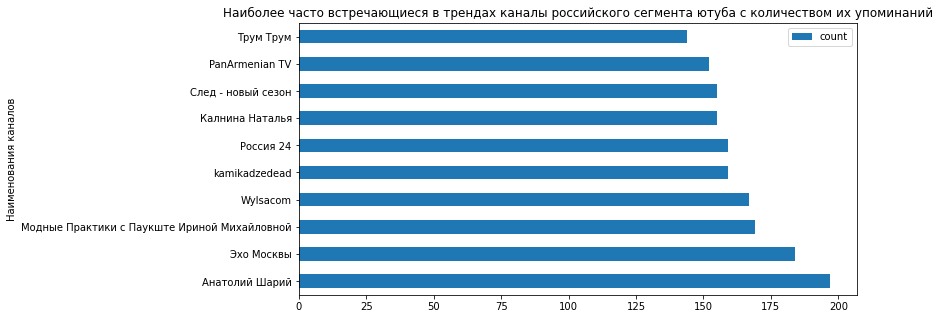

In [63]:
# По факту данная диаграмма является столбиковой в данном случае.
channels_popularity[channels_popularity.index.isin(channels_10)].plot(kind='barh', xlabel='Наименования каналов', 
                                               title='Наиболее часто встречающиеся в трендах каналы российского ' +\
                                               'сегмента ютуба с количеством их упоминаний')

### Вывод.
Из 10 каналов, чьи видео чаще всего попадали на тот период в тренды, более всего популярны были политические каналы. Следовательно, людям очень интересны видео на политическую тематику. Или же у этих каналов самые активные пользователи.

# Визуализация 2 (Линейная диаграмма).

Сделаем график, который будет представлять из себя количество просмотров за каждый месяц в 2017 и 2018 годах видео в трендах.

In [12]:
# Подготовим датафрейм.
import re
df['trending_date'] = df['trending_date'].apply(lambda x: re.sub(r'(\d{2}).(\d{2}).(\d{2})', r'\1.\3', x))

In [30]:
dynamics_by_date = df[['trending_date', 'views']].groupby('trending_date').sum()
dynamics_by_date

,views
trending_date,
17.11,580408730
17.12,1387300967
18.01,1139110173
18.02,1279076397
18.03,1520380690
18.04,1207511516
18.05,1910593081
18.06,782112971


<AxesSubplot:title={'center':'Динамика количества просмотров видео по датам в разделе "Тренды"'}, xlabel='Дата (год, месяц)', ylabel='Просмотры'>

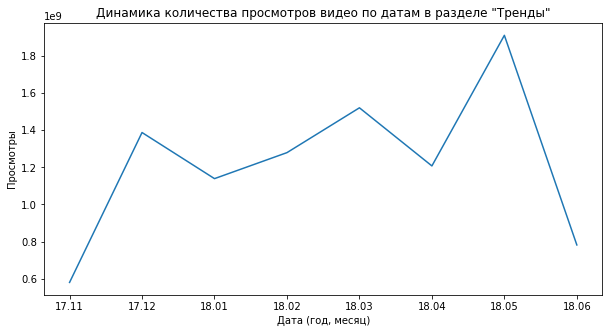

In [32]:
dynamics_by_date['views'].plot(title='Динамика количества просмотров видео по датам в разделе "Тренды"', 
                          xlabel='Дата (год, месяц)', ylabel='Просмотры')

### Вывод.
Изучим данные. Май 18 года выделяется из текущего объёма данных ростом количества просмотров видео в трендах. Изучив наиболее просматриваемые видео делаем вывод, что больше всего просмотров набирают музыкальные хиты популярных исполнителей. Но конкретно в мае топ-3 самых просматриваемых видео в трендах заняли хиты корейской группы 'BTS'.

# Визуализация 3 ("Коробка с усами").

<AxesSubplot:title={'center':'Распределение количества просмотров'}>

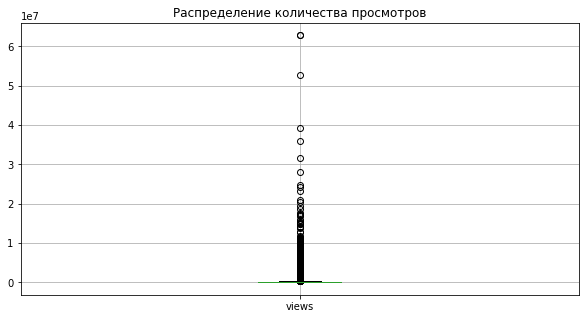

In [35]:
df['views'].plot(kind='box', grid=True, title='Распределение количества просмотров')

### Вывод.
Хотелось сделать box chart, но получилось что-то неадекватное. Из этого можно судить лишь о том, что очень небольшое количество видео набирают большое число просмотров, напротив большинство не набирают даже миллион просмотров. Можно сделать вывод, что попадание в тренды не определяется одним лишь параметров просмотров, возможно на это могут влиять соотношение лайки/дизлайки и количество комментариев, а также скорость добавления новых лайков, дизлайков и комментариев. Для работы непосредственно с большинством видео необходимо чистить данные от выбросов.

<AxesSubplot:title={'center':'Распределение количества просмотров'}>

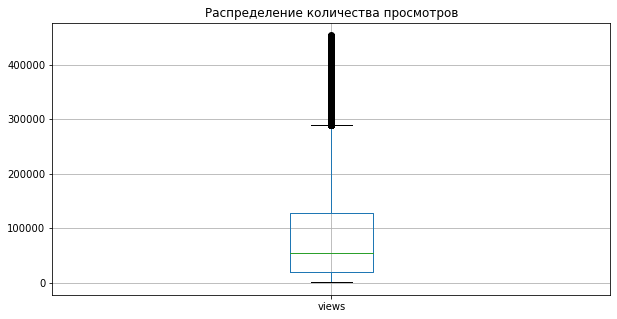

In [101]:
# Почистим данные.
df_stat = df.describe()
q1 = int(df_stat.loc['25%']['views'])
q3 = int(df_stat.loc['75%']['views'])
iqr = q3 - q1
# Нижнюю границу вводить не будем, поскольку значение просмотров уходит в отрицательный диапазон.
upper_bound = q3 + 1.5 * iqr
# Рисуем снова.
df[df['views'] <= upper_bound]['views'].plot(kind='box', grid=True, title='Распределение количества просмотров')

Вывод идентичен предыдущему, поскольку лишь редкие видео набирают много просмотров (больше 300000). Очередной раз убеждаемся, что алгоритм отбора в тренды опирается не только на количество просмотров, а также вероятно на соотношение лайков/дизлайков и на активность пользователей в комментариях.

# Визуализация 4 (Точечная диаграмма).

In [103]:
def count_ratio(row):
    if row['likes'] == 0 or row['dislikes'] == 0:
        return np.nan
    else:
        return row['likes'] / row['dislikes']

df['ratio'] = df.apply(count_ratio, axis=1)

# Чистим от выбросов.
df_stat = df.describe()
q33 = df_stat.loc['75%']['ratio'].round(2)
iqr = q33 - q11
upper_bound_ = q33 + 1.5 * iqr

<AxesSubplot:title={'center':'Корреляция между соотношением лайков/дизлайков и просмотрами.'}, xlabel='ratio', ylabel='views'>

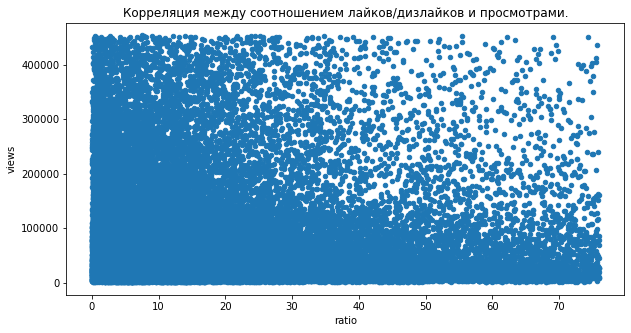

In [104]:
df[(df['views'] <= upper_bound) & (df['ratio'] <= upper_bound_)].plot(kind='scatter', x='ratio', y='views', 
                                               title='Корреляция между соотношением лайков/дизлайков и просмотрами.')

### Вывод:
Из этого графика можно сделать несколько выводов:
1) Очень малое количество видео имеют одновременно большой коэффициентов пользовательских оценок и большое количество просмотров, то есть с ростом просмотров одобрение со стороны зрителей падает или же популярные видео могут с большой вероятность быть отвергнуты.

2) Большинство видео сконцентрированы вдоль осей, что говорит о том, что видео в трендах российского сегмента ютуба могут иметь мало просмотров, но при этом большой коэффициент пользовательских оценок, и в то же время много других видео имеют большое число просмотров, но низкий коэффициент пользовательских оценок.

3) Значительное количество видео из трендов мало просматривались и имели маленький коэффициент пользовательских оценок, что может говорить о том, что публика их не приняла, но в начале они вызвали некий пользовательский интерес (например, благодаря кликбейту при помощи заголовка и картинки заставки или же благодаря активности подписчиков канала.)